<a href="https://colab.research.google.com/github/mvmelo57/dockerhub-example/blob/main/DL_Aula_09_2_4_Aplica%C3%A7%C3%A3o_de_uma_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Aplicação de uma CNN***

Redes Neurais Convolucionais

In [1]:
#Começamos com as importações:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [2]:
# Carga da base
cifar10 = tf.keras.datasets.cifar10
# Já está separado em dados de treino e teste
# Não precisa separar
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
# Normalização os dados
# Imagens em pixels de 0 - 255
# / 255.0 transforma em 0 - 1
x_train, x_test = x_train / 255.0, x_test / 255.0
# O dado y é a classe a qual faz parte
# O flattem torna os dados vetorizados
y_train, y_test = y_train.flatten(), y_test.flatten()
# Dimensão dos dados
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)
print("x_test.shape: ", x_test.shape)
print("y_test.shape: ", y_test.shape)

x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)
x_test.shape:  (10000, 32, 32, 3)
y_test.shape:  (10000,)


In [4]:
# A rede completa fica
K = len(set(y_train))
# Aqui começa o Estágio 1
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation="relu")(i)
x = Conv2D(64, (3, 3), strides=2, activation="relu")(x)
x = Conv2D(128, (3, 3), strides=2, activation="relu")(x)
# Todas as imagens são do mesmo tamanho, não precisa de Global Pooling
x = Flatten()(x)
# Aqui começa o Estágio 2
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)
# Model ( lista entrada, lista saída)
model = Model(i, x)

In [5]:
# Relatório sobre a arquitetura da rede
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 15, 15, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,180,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,284,170 (4.90 MB)

 Trainable params: 1,284,170 (4.90 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compilar o modelo
model.compile(optimizer="adam",
loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# Treinar o modelo
r = model.fit(x_train, y_train, validation_data=(x_test, y_test),
epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.3533 - loss: 1.7603 - val_accuracy: 0.5276 - val_loss: 1.3128
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.5258 - loss: 1.3157 - val_accuracy: 0.5850 - val_loss: 1.1521
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.5808 - loss: 1.1645 - val_accuracy: 0.6136 - val_loss: 1.0838
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.6213 - loss: 1.0593 - val_accuracy: 0.6435 - val_loss: 1.0176
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 35ms/step - accuracy: 0.6521 - loss: 0.9735 - val_accuracy: 0.6713 - val_loss: 0.9333
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 32ms/step - accuracy: 0.6772 - loss: 0.9079 - val_accuracy: 0.6769 - val_loss: 0.9191
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.6951 - loss: 0.8511 - val_accuracy: 0.6929 - val_loss: 0.8760
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.7111 -

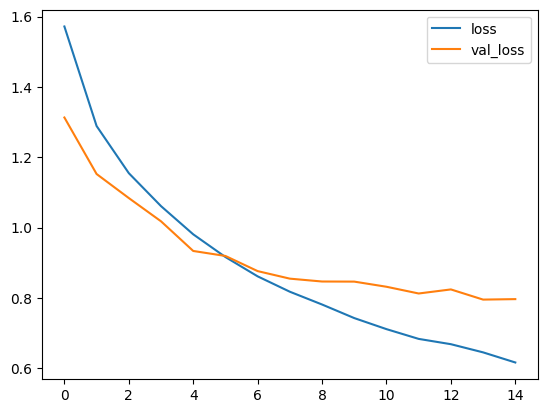

In [7]:
# Plotar a função de perda, treino e validação
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

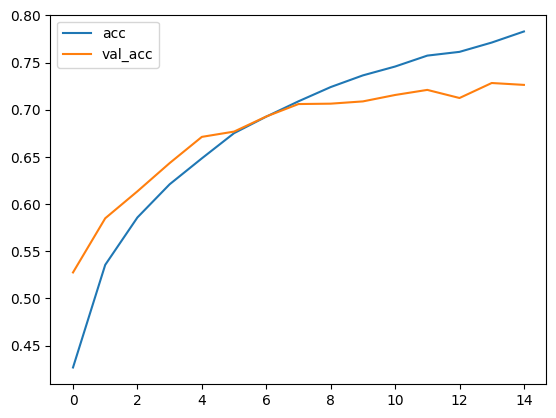

In [8]:
# Plotar acurácia, treino e validação
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

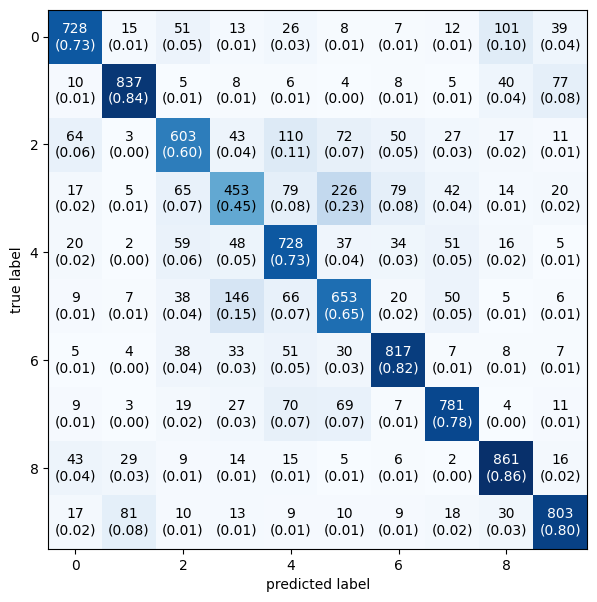

In [9]:
# Efetuar predições na base de teste
# argmax é usado pois a função de ativação da saída é softmax
# argmax pega o neurônio que deu o maior resultado, isto é,
# a maior probabilidade de saída
y_pred = model.predict(x_test).argmax(axis=1)
# Mostrar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(7, 7),
show_normed=True)

Text(0.5, 1.0, 'True label: horse Predicted: deer')

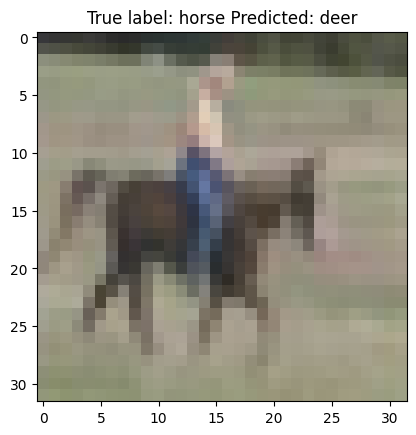

In [14]:
# Mostrar algumas classificações erradas
labels= ["airplane", "automobile", "bird", "cat", "deer", "dog",
"frog", "horse", "ship", "truck"]
misclassified = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]],
labels[y_pred[i]]))